In [1]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 206 kB 4.7 MB/s 
     |████████████████████████████████| 22.3 MB 3.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [4]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.metrics import classification_report_imbalanced

In [6]:
filen = "filtered-vancouver-training.json"
test_set = "filtered-vancouver-testing.json"
data = pd.read_json(filen, lines = True)
data_test = pd.read_json(test_set, lines = True)

In [7]:
filtered = data[["lat", "lon", "city"]].copy()
filtered_test = data_test[["lat", "lon"]].copy()

In [8]:
filtered["city"].replace(["Langley Township", "Fort Langley", "Langley ", "City of Langley/Township of Langley Border", "Township of Langley"], "Langley", inplace = True)
filtered["city"].replace(["District of North Vancouver", "North Vancouver City"], "North Vancouver", inplace = True)
filtered["city"].replace(["vancouver", "Vancouver, BC, Canada", "Vancovuer"], "Vancouver", inplace = True)
filtered["city"].replace("burnaby", "Burnaby", inplace = True)
filtered["city"].replace("British Columbia", "Vancouver", inplace = True)
filtered["city"].replace("Abbosford", "Abbotsford", inplace = True)
filtered = filtered[filtered["city"] != "Lake Errock"]
filtered = filtered[filtered["city"] != "Deroche"]
filtered = filtered[filtered["city"] != "Bowen Island"]
filtered = filtered[filtered["city"] != "Hatzic"]
filtered = filtered[filtered["city"] != "Chilliwack"]
filtered = filtered[filtered["city"] != "Mission"]
filtered = filtered[filtered["city"] != "Aldergrove"]
filtered = filtered[filtered["city"] != "Pitt Meadows"]

In [9]:
filtered = filtered[(filtered["city"] == "Vancouver") | (filtered["city"] == "Burnaby") | (filtered["city"] == "Richmond") |
                    (filtered["city"] == "Surrey")]

In [10]:
X = filtered[["lat", "lon"]]
y = filtered["city"]

X_test = filtered_test[["lat", "lon"]]
#y_test = filtered_test["city"]

model = make_pipeline(NearMiss(), SVC(kernel = "linear", C = 2))
model.fit(X, y)
y_predict = model.predict(X_test)

In [11]:
X = filtered[["lat", "lon"]]
y = filtered["city"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y)
model = make_pipeline(NearMiss(), SVC(kernel = "linear", C = 2))
model.fit(X_train, y_train)
model.score(X_valid, y_valid)
#y_predict = model.predict(X_valid)


0.5753968253968254

In [ ]:
#cross_val_score(model, X, y)

array([0.36203523, 0.33072407, 0.30919765, 0.19411765, 0.16078431])

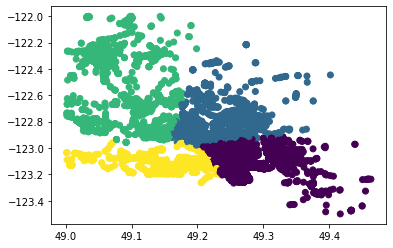

In [14]:
plt.scatter(X_test["lat"], X_test["lon"], c = (np.vectorize(city_to_num)(y_predict)), alpha = 1)
plt.show()

In [ ]:
np.unique(y_predict, return_counts=True)

(array(['Burnaby', 'Richmond', 'Surrey', 'Vancouver'], dtype=object),
 array([    1,  1128,  2872, 10646]))

In [ ]:
plt.scatter(X_valid["lat"], X_valid["lon"], c=(np.vectorize(city_to_num)(y_predict)))
plt.show()

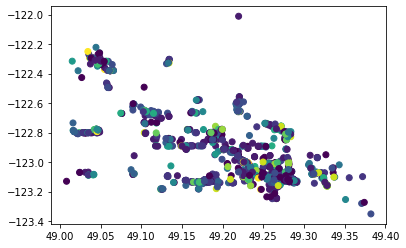

In [ ]:
plt.scatter(filtered[filtered["city"] != "Vancouver"]["lat"], filtered[filtered["city"] != "Vancouver"]["lon"], c=(filtered[filtered["city"] != "Vancouver"]["city"].apply(city_to_num)))
plt.show()


In [ ]:
vancouver = filtered[filtered["addr:city"] == "Vancouver"]
vancouver = resample(vancouver, replace = False, n_samples = 50)

surrey = filtered[filtered["addr:city"] == "Surrey"]
surrey = resample(surrey, replace = False, n_samples = 50)

richmond = filtered[filtered["addr:city"] == "Richmond"]
richmond = resample(richmond, replace = False, n_samples = 50)

burnaby = filtered[filtered["addr:city"] == "Burnaby"]
burnaby = resample(burnaby, replace = False, n_samples = 50)

langley = filtered[filtered["addr:city"] == "Langley"]
langley = resample(langley, replace = False, n_samples = 50)

others = filtered[((filtered["addr:city"] != "Vancouver") & (filtered["addr:city"] != "Surrey") & (filtered["addr:city"] != "Richmond") & 
                   (filtered["addr:city"] != "Burnaby") & (filtered["addr:city"] != "Langley"))]

In [13]:
def city_to_num(value):
    d = {
        "Vancouver": 1,
        "Burnaby": 2,
        "Surrey": 3,
        "Richmond": 4,
        "Langley": 5,
        "Maple Ridge": 6,
        "North Vancouver": 7,
        "Coquitlam": 8,
        "Delta": 9,
        "Port Coquitlam": 10,
        "District of North Vancouver": 11,
        "New Westminster": 12,
        "West Vancouver": 13,
        "Port Moody": 14,
        "White Rock": 15,
        "Abbotsford": 16
    }
    return d[value]
